# Interpolating Polynomials
### Authors
Varun Chitturi, FNU Kalkin, Aditya Patel

### Division of Labor

|Name|Task|
|-----------|-----------|
|Varun Chitturi|Worked on graphs and question 2, 3, and 5|
|Aditya Patel|Worked on questions 1, 2, 4, and 5|
|FNU Kalkin|Created Polynomial library to integrate, add, evaulate, and interpolate polynomials as well as find derivatives and roots|

### Math Work
We used physics concepts for finding displacement and acceleration from the velocity graph, employing integrals and derivatives.

For finding the coefficients of the polynomial itself, we found a system of equations with the given points and put this system into a matrix and then solved it.

For evaluating the polynomials, we simply found the dot product of the coefficients vector and the x value vector. The resultant was the value of the polynomial.

For finding the integrals/derivatives, we used simple recursion, modifying the coefficients vector one coefficient at a time. The position of the coefficient in the vector represents the power of x it corresponds with, so we used that to find the new coefficient.

For finding the roots, we used a recursive algorithm with Newton's method.

In [16]:
from Polynomial import *
import matplotlib.pyplot as plt
import numpy as np

## Question 1
Find the interpolating polynomial of degree 3 which passes through (1,29), (-1,-35), (2,31), and (-3,-19).

In [17]:
poly = Polynomial(
    Point(1, 29),
    Point(-1, -35),
    Point(2, 31),
    Point(-3, -19))
print(poly)

-4x^3 - 2x^2 + 36x - 1


## Question 2

To construct a fourth degree polynomial which "looks like" the graph of y = 2^t, one could specify that the polynomial go through the following five points: (-1, 0.5), (0,1), (1,2), (2,4), and (3,8).
a) Find the desired interpolating polynomial
b) Graph both. How close are the values of the polynomial and the function for t values between -1 and 3? What happens when the polynomial is compared to the function at t values outside of this interval? If you needed to use the interpolating polynomial to approximate 2t y = what types of mathematical precautions would you take?

In [18]:
poly = Polynomial(
    Point(-1, 0.5),
    Point(0, 1),
    Point(1, 2),
    Point(2, 4),
    Point(3, 8))
print(poly)

0.021x^4 + 0.042x^3 + 0.229x^2 + 0.708x + 1


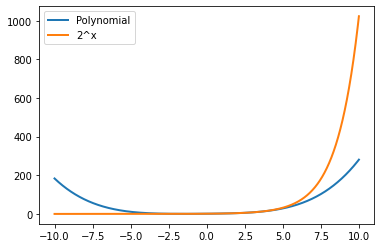

In [19]:
x = np.arange(-10, 10, 0.001)
y1 = poly.evaluate(x)
y2 = 2 ** x

fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.plot(x, y2, linewidth=2.0)

plt.legend(["Polynomial", "2^x"])

plt.show()


The curve fit is very good between -1 and 3. Outside this interval, the fit becomes less accurate. Some mathematical precautions we would take when approximating are making sure the desired x value is in a reasonable range and that the polynomial is of a high degree.

## Question 3
Interpolating polynomials allow us to estimate values of an unknown function between known data points. For example, consider the data in Table 1, which was taken from Car and Driver magazine1. Five sport utility vehicles were tested for their acceleration: the data reported were the time it took each vehicle to go from 0 to 30 m.p.h., from 0 to 60 m.p.h., and from 0 to 90 m.p.h. For each vehicle, write the third degree interpolating polynomial and use that polynomial to find an estimate for the time it would take the vehicle to accelerate from 0 m.p.h. to 50 m.p.h. Note: to obtain the polynomials, it may be easier to write the data in the form suggested by Table 2.

| Vehicle           | 0-30 mph | 0-60 mph | 0-90 mph |
|-------------------|----------|----------|----------|
| Honda CR - VEX    | 3.1      | 10.3     | 30.1     |
| Jeep Cherokee SE  | 3.2      | 12       | 38.2     |
| Kia Sportage      | 4.2      | 12.8     | 38.7     |
| Subaru Forester L | 2.8      | 9.5      | 22.7     |
| Toyota RAV4       | 3.0      | 10.2     | 31.7     |

Table 1: Acceleration Times (seconds) for various models of automobiles


<br>

|Velocity Data||||
|-------------------|----------|----------|-----------------------|
| Honda CR - VEX    | Time      |0| 3.1   | 10.3     | 30.1 |
|                   | Velocity  |0| 30    | 60     | 90    |
| Jeep Cherokee SE  | Time      | 0|3.2   | 12     | 38.2     |
|                   | Velocity  |0| 30    | 60     | 90     |
| Kia Sportage      | Time      | 0|4.2   | 12.8     | 38.7    |
|                   | Velocity  |0| 30    | 60    | 90  |
| Subaru Forester L | Time      |0| 2.8   | 9.5     | 22.7     |
|                   | Velocity  |0| 30    | 60     | 90     |
| Toyota RAV4       | Time      |0| 3.0   | 10.2     | 31.7     |
|                   | Velocity  |0| 30    | 60     | 90    |

Table 2: Elapsed Time (seconds) and Velocities (m.p.h.) for various models of automobiles

In [21]:
car_velocities_to_time = {
    'Honda':{0:0, 30:3.1, 60:10.3, 90:30.1},
    'Jeep':{0:0, 30:3.2, 60:12, 90:38.2},
    'Kia':{0:0, 30:4.2, 60:12.8, 90:38.7},
    'Subaru':{0:0, 30:2.8, 60:9.5, 90:22.7},
    'Toyota':{0:0, 30:3.0, 60:10.2, 90:31.7},
}

velocity_functions = {}

for car in car_velocities_to_time:
    velocities = car_velocities_to_time[car]
    velocity_func = Polynomial(
        Point(velocities[0], 0),
        Point(velocities[30], 30),
        Point(velocities[60], 60),
        Point(velocities[90], 90),
    )
    velocity_functions[car] = velocity_func
    print(f'{car} V(t) =', velocity_func)
    velocity_fifty = velocity_func.polynomial_sum(Polynomial(Point(0, -50)))
    print(f'The {car} reaches a velocity of 50 mph at {velocity_fifty.find_roots_range(0, 15)[0]} seconds\n')

Honda V(t) = 0.015x^3 - 0.729x^2 + 11.799x + 0
The Honda reaches a velocity of 50 mph at 6.534 seconds

Jeep V(t) = 0.011x^3 - 0.669x^2 + 11.401x + 0
The Jeep reaches a velocity of 50 mph at 6.764 seconds

Kia V(t) = 0.006x^3 - 0.381x^2 + 8.645x + 0
The Kia reaches a velocity of 50 mph at 8.681 seconds

Subaru V(t) = 0.024x^3 - 0.952x^2 + 13.192x + 0
The Subaru reaches a velocity of 50 mph at 5.985 seconds

Toyota V(t) = 0.015x^3 - 0.77x^2 + 12.175x + 0
The Toyota reaches a velocity of 50 mph at 6.325 seconds



## Question 4
In the problem above, consider the total distance each vehicle will travel while it accelerates from 0 to 90 m.p.h. That quantity can be calculated by integrating the velocity function v(t) for the vehicle. There is one small problem to overcome first. In this problem v(t) is measured in miles per hour and t is measured in seconds, so v(t) should be converted to miles per second before proceeding. The velocity function in miles per second is v(t)/3600. The distance traveled by the vehicle would be ∫T v(t) 3600dt, where T is the time at which the vehicle reaches 90 m.p.h. The real 0 velocity function v(t) is not known in this case, but interpolating polynomials for v(t) are available which should approximate v(t). Use the interpolating polynomials you generated in the previous exercise to approximate the distance needed for each vehicle to accelerate from 0 to 90 m.p.h.

In [22]:
for car in velocity_functions:
    velocity_func = velocity_functions[car]
    position_func = velocity_func.get_integral(C=0)
    velocity_ninety = velocity_func.polynomial_sum(Polynomial(Point(0, -90)))
    ninety_mph_time = velocity_ninety.find_roots_range(0, 50)[0]
    displacement = position_func.evaluate(ninety_mph_time)/3600
    print(f'The {car} travels {displacement} miles while accelerating to 90 mph')

The Honda travels 0.47000504439644275 miles while accelerating to 90 mph
The Jeep travels 0.5304928111282531 miles while accelerating to 90 mph
The Kia travels 0.6294631796429101 miles while accelerating to 90 mph
The Subaru travels 0.3561179182821022 miles while accelerating to 90 mph
The Toyota travels 0.48005447524155137 miles while accelerating to 90 mph


## Question 5
One major issue in using interpolating polynomials can be called "goodness of fit." In fitting a polynomial through given data points, it is assumed that there ought to be a polynomial relationship between the independent and dependent variables. Question 2 showed that is not always the case. Use MATLAB to plot the interpolating polynomials you generated in Question 3. Do you believe there is a polynomial relationship between elapsed time and the velocity of the vehicles? What evidence do you have to support your conclusion?

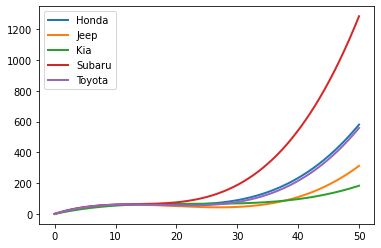

In [23]:
x = np.arange(0, 50, 0.001)

carFig, ax = plt.subplots()

for car in velocity_functions:
    ax.plot(x, velocity_functions[car].evaluate(x), linewidth=2.0)

plt.legend(velocity_functions.keys())

plt.show()

We don't think that there is a polynomial relationship between elapsed time and velocity. By looking at the end behavior on the graph above, it would seem that velocity is unbounded. However, we know that velocity level off after some time and remain nearly constant, so it clearly can't be a polynomial relationship.

### Polynomial Class for Reference

In [ ]:
class Point:
    """
    A type to hold a point in a cartesian coordinate plane
    """
    def __init__(self, x, y):
        """

        :param x: X value of the point
        :param y: Y value of the point
        """
        # print(type(x), type(y))
        assert (type(x) == int or type(x) == float) and (type(y) == int or type(y) == float), \
            "X and Y values must be numerical"

        self.x = x
        self.y = y

    def __eq__(self, obj):
        return self.x == obj.x and self.y == obj.y

In [ ]:
from zipfile import LargeZipFile
from .Point import Point
import numpy as np

class Polynomial:
    """
    A type to hold polynomial equations
    """

    def __init__(self, *points: Point, coeffs=None):
        """

        :param points: The points that the polynomial intersects
        :param coeffs: A list of coefficients of the polynomial
        """

        if points:
            self.points = points
            self.degree = len(points) - 1
            constants = [point.y for point in points]
            x_vals = self.get_x_coeffs()
            self.coeffs = np.linalg.solve(x_vals, constants)
        elif coeffs:
            self.coeffs = coeffs
            self.degree = len(coeffs) - 1
        else:
            assert "Please enter either a list of points or a list of coefficients"

    def __str__(self):
        return Polynomial._clean_str(Polynomial._str_helper(self.coeffs, self.degree))

    def __eq__(self, obj):
        ob1Coeffs = self.coeffs
        ob2Coeffs = obj.coeffs
        if ob1Coeffs[-1] == ob2Coeffs[-1] and ob1Coeffs[-1] == 'C' and ob2Coeffs[-1] == 'C':
            ob1Coeffs.pop()
            ob2Coeffs.pop()
        elif obj.coeffs[-1] != self.coeffs[-1]:
            return False

        return [round(float(x), 12) for x in list(ob1Coeffs)] == [round(float(x), 12) for x in list(ob2Coeffs)] and self.degree == obj.degree

    def polynomial_sum(self, poly_2):
        """
        
        Returns a sum of two polynomials
        """
        bigger_polynomial = max(self, poly_2, key=lambda x:len(x.coeffs))
        smaller_polynomial = min(self, poly_2, key=lambda x:len(x.coeffs))

        result = []
        for i in range(1, len(smaller_polynomial.coeffs) + 1):
            result.insert(0, bigger_polynomial.coeffs[-i] + smaller_polynomial.coeffs[-i])
        for i in range(len(smaller_polynomial.coeffs) + 1, len(bigger_polynomial.coeffs) + 1):
            result.insert(0, bigger_polynomial.coeffs[-i])

        return Polynomial(coeffs=result)
    
    def get_derivative(self):
        """

        :return: Returns the derivative of a polynomial
        """
        coeffs = Polynomial._derivative_helper(self.degree, self.coeffs)
        return Polynomial(coeffs=coeffs)

    def get_integral(self, C='C'):
        """

        :return: Returns the integral of a polynomial
        """
        coeffs = Polynomial._integral_helper(self.degree, self.coeffs, C)
        return Polynomial(coeffs=coeffs)

    def get_x_coeffs(self):
        """

        :return: A coefficient matrix of a polynomial
        """
        coeffs = []

        for point in self.points:
            eq = []
            for degree in range(self.degree + 1):
                eq.insert(0, point.x ** degree)
            coeffs.append(eq)
        return np.array(coeffs)

    def evaluate(self, x):
        """

        :return: Returns the value of a polynomial at a given point
        """
        if np.isscalar(x):
            x_vector = []
            for degree in range(self.degree + 1):
                x_vector.insert(0, x ** degree)
            x_vector = np.array(x_vector)
            return np.matmul(self.coeffs, x_vector)
        else:
            y = np.zeros_like(x, dtype=float)
            for (i, degree) in enumerate(range(self.degree, -1, -1)):
                if self.coeffs[i] != "C":
                    y += (x ** degree) * self.coeffs[i]
            return y

    def find_root(self, init_guess):
        """

        :return: Returns a root of a polynomial given an initial guess
        """
        y = self.evaluate(init_guess)
        if round(y * 1000) / 1000 == 0:
            return init_guess
        try:
            y_prime = self.get_derivative().evaluate(init_guess)
            return self.find_root(init_guess - y / y_prime)
        except RecursionError as e:
            return None

    def find_roots_range(self, min, max, width=1):
        """

        :return: Returns a list of all roots of a polynomial over a given range
        """
        solutions = []
        while min <= max:
            if self.find_root(min):
                sol = round(1000 * self.find_root(min)) / 1000
                if sol not in solutions:
                    solutions.append(sol)
            min += width
        return solutions

    @staticmethod
    def _clean_str(string):
        return string.replace("+ -", '- ').replace('x^1 ', 'x ')

    @staticmethod
    def _derivative_helper(degree, coeffs):
        if degree == 0:
            return []
        return [coeffs[0] * degree] + Polynomial._derivative_helper(degree - 1, coeffs[1:])

    @staticmethod
    def _integral_helper(degree, coeffs, C):
        if degree == 0:
            return [coeffs[0], C]
        return [coeffs[0] / (degree + 1)] + Polynomial._integral_helper(degree - 1, coeffs[1:], C)

    @staticmethod
    def _str_helper(sols, degree):
        a = sols[0]

        if type(a) != str:
            a = round(a * 1000) / 1000.0
            if a % 1.0 in [0, 0.0]:
                a = int(a)

        if degree == 0:
            return str(a)
        else:
            if a == 1:
                return f'x^{degree} + ' + Polynomial._str_helper(sols[1:], degree - 1)
            elif a == -1:
                return f'-x^{degree} + ' + Polynomial._str_helper(sols[1:], degree - 1)
            return f'{a}x^{degree} + ' + Polynomial._str_helper(sols[1:], degree - 1)
